In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
ds=pd.read_csv('C:/Users/user/Downloads/default_plus_chromatic_features_1059_tracks_new.csv')

In [3]:
feature=ds.iloc[:, :-1]
label_str=ds.iloc[:,-1]

In [4]:
lb_make = LabelEncoder()
label=lb_make.fit_transform(label_str)
#np.unique(label)

In [5]:
feature_scaled = StandardScaler().fit_transform(feature.values)

# Question 1 

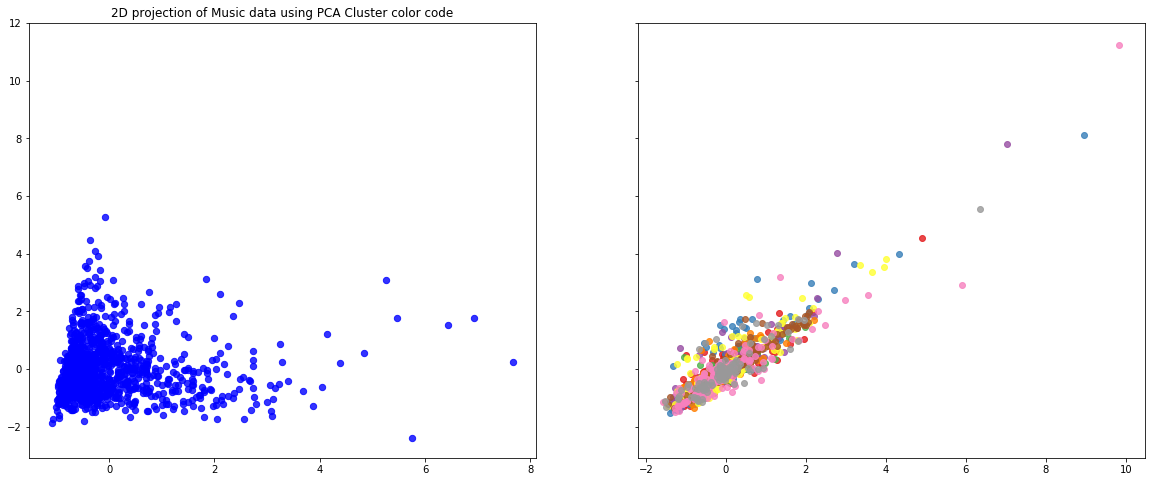

In [7]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(feature_scaled)
pca_result = StandardScaler().fit_transform(pca_result)


f, (ax1,ax2) = plt.subplots(1,2, sharey=True, figsize=(20,8))
ax1.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', s=40, cmap='jet', zorder=2,alpha=0.8)

for i,label_id in enumerate(np.unique(label)):
        idx = np.where(label==label_id)[0]
        ax2.scatter(feature_scaled[idx, 0], feature_scaled[idx, 1],
                    color= plt.cm.Set1(i / float(len(np.unique(label)))),
                    linewidth='1',
                    alpha=0.8)
        
ax1.set_title("2D projection of Music data using PCA")
ax1.set_title("2D projection of Music data using PCA Cluster color code")

plt.show()

# Question 2 Rand Index on reduced Dataset

In [8]:
wcss = []
rand_score = []
pca_comp = []

CHOSEN_K = 32
kmeans = KMeans(n_clusters=CHOSEN_K, init="k-means++", n_init=10, max_iter=300) 
for i in [2,4,8,16,32]:
    pca_comp.append(i)
    pca = PCA(n_components=i)
    pca_result = pca.fit_transform(feature_scaled)
    pca_result = StandardScaler().fit_transform(pca_result)
    y_pred_fs_pca = kmeans.fit_predict(pca_result)
          
    wcss.append( kmeans.inertia_ )
    print(y_pred_fs_pca)
        
    rand_score.append(adjusted_rand_score(label, y_pred_fs_pca))

[13 20 17 ...  3  0 22]
[ 5 12 20 ... 19  1  9]
[17  5 23 ...  7 20 18]
[19 15  8 ... 10 31 20]
[ 5 17  5 ... 17 28 13]


In [9]:
score1_dict = {'PCA component': pca_comp, 'Rand Index(K='+str(CHOSEN_K)+')': rand_score, 'SSE': wcss}
score1_result = pd.DataFrame(data=score1_dict)
score1_result

,PCA component,Rand Index(K=32),SSE
0,2,0.022386,75.554978
1,4,0.045297,781.914632
2,8,0.061809,2849.467996
3,16,0.076767,8210.757409
4,32,0.082390,22277.218586


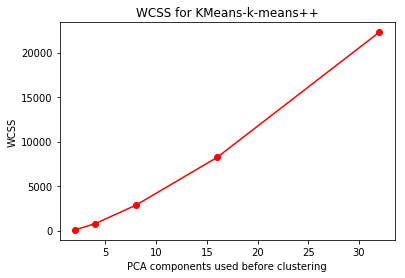

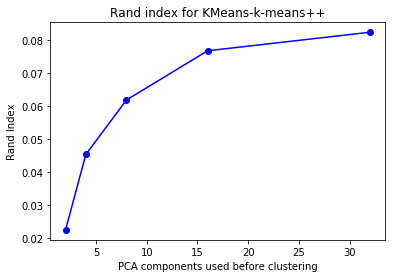

In [10]:
plt.plot(score1_result['PCA component'].values, score1_result['SSE'].values , 'ro-', label="WCSS")
plt.title("WCSS for KMeans-k-means++")
plt.xlabel("PCA components used before clustering")
plt.ylabel("WCSS")
plt.show()

plt.plot(score1_result['PCA component'].values, score1_result['Rand Index(K=32)'].values , 'bo-', label="Rand Index")
plt.title("Rand index for KMeans-k-means++")
plt.xlabel("PCA components used before clustering")
plt.ylabel("Rand Index")
plt.show()